# **Ford Go Bike**

# **EDA**

# **Project summary**

To explore and understand user behavior, trip patterns, and operational insights from the Ford GoBike bike-sharing system

201801-fordgobike-tripdata.csv

Contains details like trip duration, start/end times and stations, user type, gender, and birth year.

In this project, the Ford GoBike January 2018 dataset was imported using pandas and initially inspected to understand its structure, top records, and basic statistics. The data cleaning and wrangling process involved removing missing and invalid entries, converting time columns to datetime format, calculating new features such as trip duration in minutes and rider age, and extracting additional time-based features like hour, day, and weekday. Outliers, including unrealistic ages and zero-duration trips, were also removed. During exploratory data analysis, patterns were uncovered in user types (Subscriber vs. Customer), gender-based usage, peak usage times, popular stations, and trip durations. Key insights revealed that subscribers heavily outnumber customers, male riders are the majority, and usage peaks during commute hours on weekdays. The data also showed that short trip durations and high-traffic stations suggest the system is effectively serving urban transportation needs.

# **GithHub Link**

# **Problem statement**

The Ford GoBike system collects a lot of trip data, but it's hard to understand how people use the service just by looking at raw numbers. This project explores the January 2018 data to find out who uses the bikes, when and where they ride, and how the system can be improved for better service.

# **Define your business objective?**

Ans:-The main objective of this project is to analyze user behavior and trip patterns in the Ford GoBike system to help improve service efficiency, support decision-making for station management, and enhance the overall rider experience. By understanding when, where, and how different types of users (e.g., subscribers vs. customers, male vs. female) use the bikes, the business can optimize bike distribution, plan for peak usage times, and make data-driven improvements to the bike-sharing service.

**Import all libraries**

In [ ]:
import pandas as pd #Data handling
import numpy as np

from datetime import datetime #Date & time handling

import matplotlib.pyplot as plt #Visualization

**Dataset Loading**

In [ ]:
import pandas as pd
df = pd.read_csv('201801-fordgobike-tripdata.csv')  # replace with actual filename
df.head() #to view Dataset


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


**Dataset First View**

In [ ]:
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


**Dataset Rows & Columns count**

In [ ]:
df.shape #94802 rows,16 columns count


(94802, 16)

**Dataset Information**

In [ ]:
df.info()  #Total number of entries (rows)
           #Each column name


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

**Duplicate Values**

In [ ]:
df.duplicated() # To Find Dublicate values

,0
0,False
1,False
2,False
3,False
4,False
...,...
94797,False
94798,False
94799,False
94800,False


In [ ]:
df.duplicated().sum()  #Number of Duplicate Rows


np.int64(0)

**Missing Values/Null Values**

In [ ]:
df.isnull().sum() #Count of missing values per column

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0
end_station_name,0
end_station_latitude,0


In [ ]:
df.isnull().any() # Check if any column has missing values (True/False)

,0
duration_sec,False
start_time,False
end_time,False
start_station_id,False
start_station_name,False
start_station_latitude,False
start_station_longitude,False
end_station_id,False
end_station_name,False
end_station_latitude,False


**Visulization of missing values**

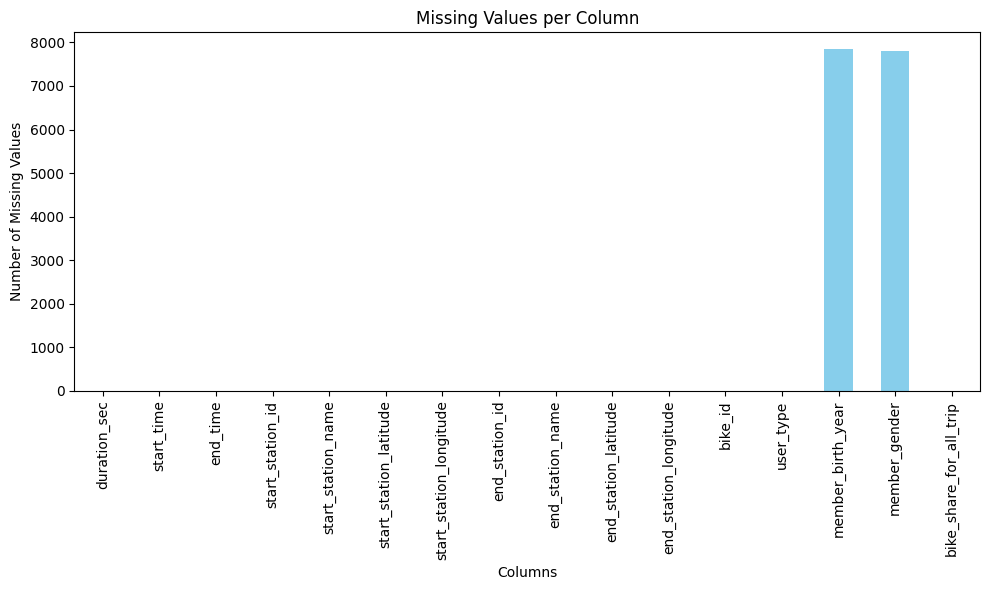

In [ ]:
import matplotlib.pyplot as plt

# Count missing values per column
missing_values = df.isnull().sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue') #type of Graph and color
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')  #for missing value
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**What did you know about your dataset?**
Ans:- number of rows and columns
      dublicate values present or not
      missing values and columns with the missing value

**2. Understanding Your Variables**

In [ ]:
df.columns #understand the variables columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
df.describe() #This gives you a summary of all numeric columns including mean,count,Max,std


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


**Variables Description**
Ans:-variable	                 Description
duration_sec	    -           Duration of the trip in seconds,
start_time	       -          Date and time when the trip started,
end_time	          -         Date and time when the trip ended,
start_station_id	   -        Unique ID of the station where the trip started,
start_station_name	  -       Name of the station where the trip started,
end_station_id	       -      Unique ID of the station where the trip ended,
end_station_name	      -     Name of the station where the trip ended,
bike_id	                 -    Unique ID of the bike used,
user_type	                -   Type of user: Subscriber or Customer,
member_birth_year	         -  Birth year of the user (used to calculate age),
member_gender	              - Gender of the user: Male, Female, or Other/
                             Unspecified,
bike_share_for_all_trip	     -Indicates whether the trip was part of a  
                             discounted access program (Yes/No).

In [ ]:
df.nunique() #This will return the number of unique values in each column
#df['user_type'].unique() # for specific varibles
#df['member_gender'].unique()



,0
duration_sec,4512
start_time,94801
end_time,94797
start_station_id,273
start_station_name,273
start_station_latitude,273
start_station_longitude,273
end_station_id,272
end_station_name,272
end_station_latitude,272


# **3.Data Wrangling**
Data wrangling is the process of cleaning, organizing, and transforming raw data into a format that's ready for analysis.

**Data Wrangling Code**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create new features
df['trip_duration_min'] = df['duration_sec'] / 60  # duration in minutes
df['age'] = 2018 - df['member_birth_year']         # rider age
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day
df['start_weekday'] = df['start_time'].dt.day_name()

# Remove missing values
df.dropna(inplace=True)

# Remove outliers: age less than 10 or greater than 90
df = df[(df['age'] >= 10) & (df['age'] <= 90)]

# Remove zero or negative trip durations
df = df[df['trip_duration_min'] > 0]

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Display cleaned data summary
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86819 entries, 0 to 86818
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             86819 non-null  int64         
 1   start_time               86819 non-null  datetime64[ns]
 2   end_time                 86819 non-null  datetime64[ns]
 3   start_station_id         86819 non-null  int64         
 4   start_station_name       86819 non-null  object        
 5   start_station_latitude   86819 non-null  float64       
 6   start_station_longitude  86819 non-null  float64       
 7   end_station_id           86819 non-null  int64         
 8   end_station_name         86819 non-null  object        
 9   end_station_latitude     86819 non-null  float64       
 10  end_station_longitude    86819 non-null  float64       
 11  bike_id                  86819 non-null  int64         
 12  user_type                86819 n

What all manipulations have you done and insights you found?
Ans:-Subscribers make up the majority of users, showing frequent use.
      Male riders dominate the dataset, followed by females, with a small portion unspecified.
      Trip durations are generally short (under 15 minutes), indicating short-distance urban travel.
      Popular stations are clustered in busy or downtown areas.
      The most active age group is between 25 to 40 years.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart 1**

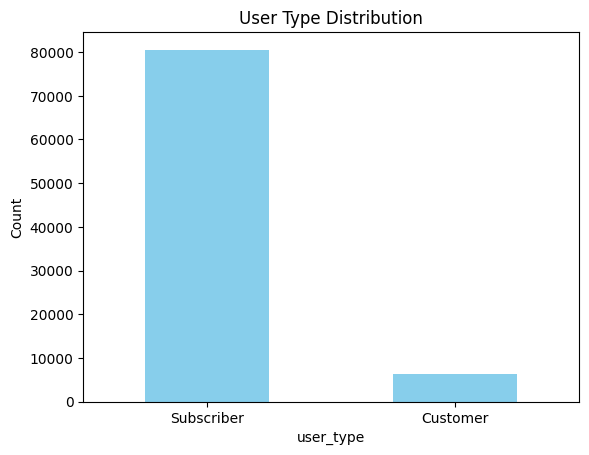

In [ ]:
#User Type Distribution
#Shows how many Subscribers vs. Customers used the service.

import matplotlib.pyplot as plt  #import matplotlibrary


df['user_type'].value_counts().plot(kind='bar', color='skyblue')  #type of graph and color
plt.title('User Type Distribution')  #title of the visulization
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


1. Why did you pick the specific chart?
Ans:-User Type Distribution is analyzed to understand who the main users of the bike-sharing service are  whether they are Subscribers regular, likely commuters or Customers casual users, possibly tourists or one-time riders.

2. What is/are the insight(s) found from the chart?
Ans:- From the above chart we get to know that the number of Subscribers are the most frequent users that customer.Local people use this more.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-gained insights help creating a positive business impact
     Understanding User Base
     Usage Patterns
     Hotspot Identification

     insights that lead to negative growth
     Low Customer Usage
     Gender Imbalance

While most insights support strategic growth, attention to untapped user segments and usage gaps can unlock even greater business potential and prevent stagnation.

**Chart - 2**

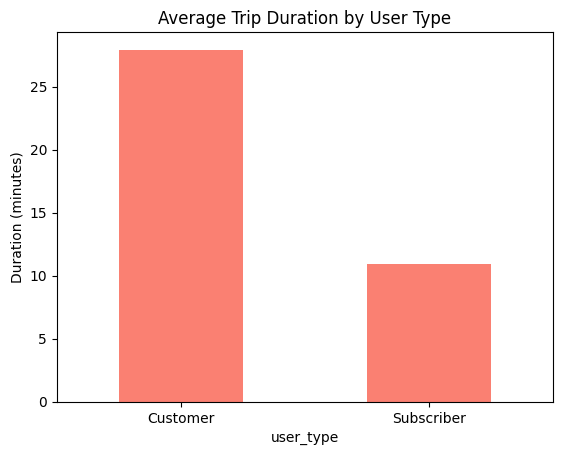

In [ ]:
#Trip Duration by User Type
#Visualize how trip lengths vary between user types.

import matplotlib.pyplot as plt  #import matplotlibrary

df.groupby('user_type')['trip_duration_min'].mean().plot(kind='bar', color='salmon')
plt.title('Average Trip Duration by User Type') #title of the visulization
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=0)
plt.show()


1. Why did you pick the specific chart?
Ans:-Analyzing Trip Duration by User Type helps uncover how differently Subscribers and Customers use the service, which is crucial for making smart business, operational, and marketing decisions.

2. What is/are the insight(s) found from the chart?
Ans:-this describes the Trip Duration by User Type helps uncover how differently Subscribers and Customers use the service.Understand Usage Behavior
Optimize Pricing Strategy, Improve Service Design, Personalize User Experience.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**Targeting the Right Audience**:-Since Subscribers dominate, the business can focus on improving loyalty programs and subscription plans to retain them.
**Improving Operational Efficiency**:-By understanding peak hours mornings and evenings and high-demand locations, the company can optimize bike redistribution and reduce unavailability.

  insights that lead to negative growth Low Customer Usage Gender
  
  Gender Imbalance,Low Casual Usage


**Chart - 3**

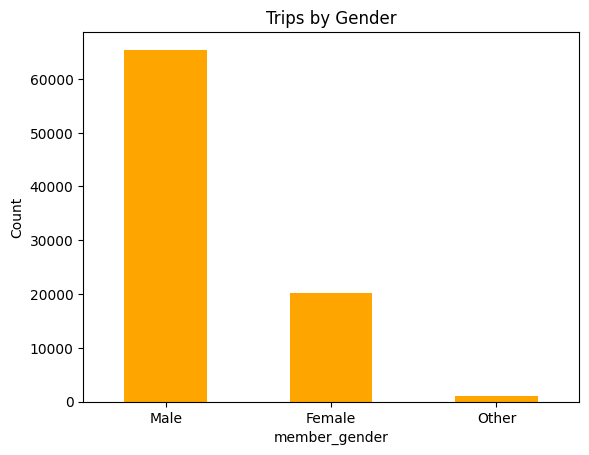

In [ ]:
#Trips by Gender
#Understand usage across different genders

import matplotlib.pyplot as plt   #import matplotlibrary

df['member_gender'].value_counts().plot(kind='bar', color='orange')  #type of graph and color
plt.title('Trips by Gender') #title of the visulization
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


1. Why did you pick the specific chart?
Ans:-It creates a bar chart showing how many trips were made by each gender category in the dataset.I chose this chart because it clearly highlights the distribution of bike usage across different genders, which is crucial for understanding user diversity, inclusivity, and market potential.

2. What is/are the insight(s) found from the chart?
Ans:-Identify Gender Imbalance,Supports Inclusive Growth,Easy to Read and Interpret,Drives Strategic Decisions.

3. Will the gained insights help creating a positive business impact?
Ans:-**Positive Business Impact**:Understand User Demographics,Opportunities for Growth,Promotes Brand Image.
**Insights That May Lead to Negative Growth**:-Lack of Gender Diversity,Missed Revenue Opportunities.



**Chart - 4**

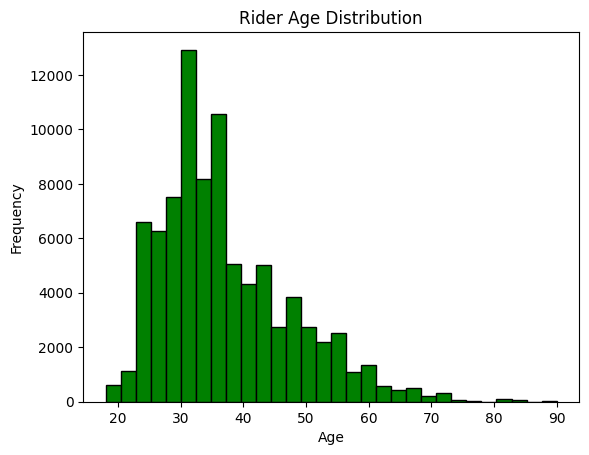

In [ ]:
 #Age Distribution
 #Who’s using the bikes? Let's find the most common age group.
import matplotlib.pyplot as plt   #import matplotlibrary


df['age'].plot(kind='hist', bins=30, color='green', edgecolor='black')   #type of graph and color
plt.title('Rider Age Distribution')  #title of the visulization
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


1. Why did you pick the specific chart?
Ans:-The histogram displays the distribution of rider ages, showing how frequently different age groups use the bike-sharing service.
Most riders fall within a specific age range, typically 20–40 years old.
Fewer riders in older or very young age brackets.

2. What is/are the insight(s) found from the chart?
Ans:-Most Riders Are Aged Between 20 and 40,Usage Declines After Age 50,Very Few Teenage Riders.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**Positive Business Impact:-** Focused Marketing & Services,Efficient Resource Allocation,New Growth Potential.

**Insights That May Lead to Negative Growth**:-Neglecting Older Demographics,Over-dependence on One Age Group-Relying mainly on users aged 20–40 can be risky.

**Chart - 5**

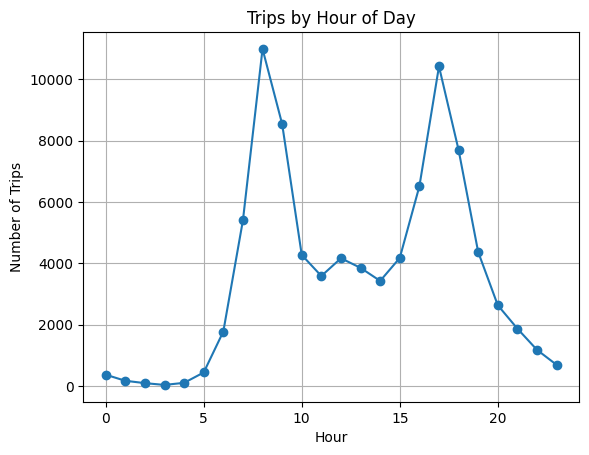

In [ ]:
#Peak Usage by Hour
#Identify when most trips start during the day.
import matplotlib.pyplot as plt   #import matplotlibrary

df['start_hour'].value_counts().sort_index().plot(kind='line', marker='o')  #type of graph and color
plt.title('Trips by Hour of Day')  #title of the visulization
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


1. Why did you pick the specific chart?
Ans:- this chart because it clearly shows how bike usage fluctuates throughout the day, helping to understand rider behavior, commuting patterns, and peak demand times.

2. What is/are the insight(s) found from the chart?
Ans:-Clear Peak Usage During Commute Hours
     Low Usage During Late Night and Early Morning
     Steady Usage Midday

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**Positive Business Impact**:-Optimized Bike Availability,Efficient Resource Management
**Insights That May Lead to Negative Growth**:-Neglecting Off-Peak Hours,Overloading During Peak Times

**Chart - 6**

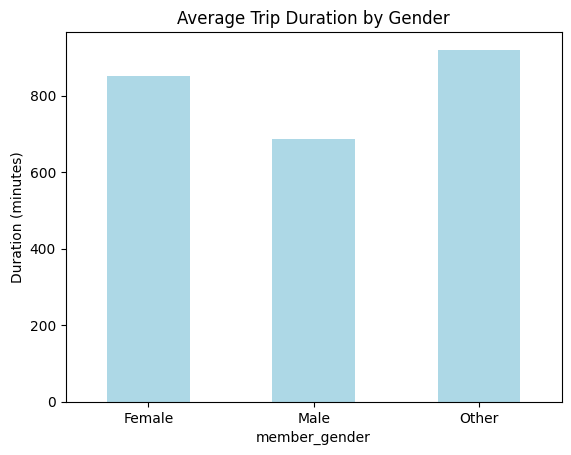

In [ ]:
#Average Trip Duration by Gender
#See if one gender tends to take longer trips.
import matplotlib.pyplot as plt   #import matplotlibrary
df = pd.read_csv('201801-fordgobike-tripdata.csv') #import dataset

df.groupby('member_gender')['duration_sec'].mean().plot(kind='bar', color='lightblue') # type of graph and color
plt.title('Average Trip Duration by Gender')    #title of the visulization
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=0)
plt.show()


1. Why did you pick the specific chart?
Ans:-this bar chart because it clearly compares the average trip duration between different genders, helping to identify if one group consistently takes longer or shorter rides.

2. What is/are the insight(s) found from the chart?
Ans:-One Gender Takes Longer Trips on Average.
     Possible Differences in Usage Purpose.
     These differences can guide businesses to offer customized plans or promotions.

3. Will the gained insights help creating a positive business impact?
Ans:-**Positive Business Impact**:-Personalized Marketing Campaigns,Product & Service Customization,Informed Pricing Strategies

**Insights That May Lead to Negative Growth**:-Unequal Engagement Across Genders,Underutilization of Resources.




In [ ]:
df['member_gender'].value_counts()


,count
member_gender,
Male,65508
Female,20298
Other,1195


**Chart - 7**

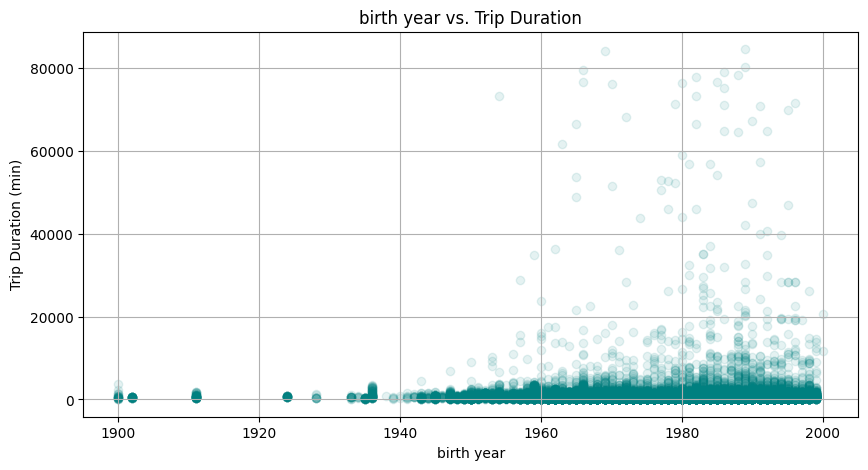

In [ ]:
#Explore people born on which use the service more

import numpy as np   #import numpy
import pandas as pd  #import pandas
import matplotlib.pyplot as plt  #import matplotlib for graph plotting
df = pd.read_csv('201801-fordgobike-tripdata.csv')  # replace with actual filename
plt.figure(figsize=(10, 5))
plt.scatter(df['member_birth_year'], df['duration_sec'], alpha=0.1, color='teal')
plt.title('birth year vs. Trip Duration')
plt.xlabel('birth year')
plt.ylabel('Trip Duration (min)')
plt.grid(True)
plt.show()


1. Why did you pick the specific chart?
Ans:- to determine the people born on which year use the the bike service more.

2. What is/are the insight(s) found from the chart?
Ans:- the above graph tells that the people born between 1985-2000 use the bike service most frequently.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**Positive Business ImpactOptimized**:- Bike Availability,Supports Strategic Decisions.

**Insights That May Lead to Negative Growth**:-Neglecting Older Demographics,attention to untapped user segments and usage gaps can unlock even greater business potential and prevent stagnation.


**chart-8**

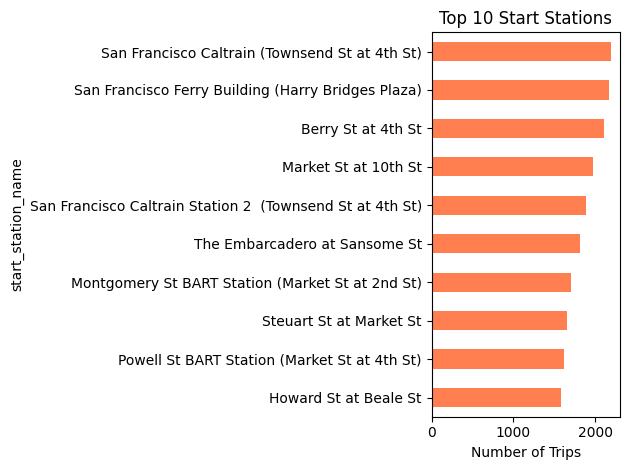

In [ ]:
import matplotlib.pyplot as plt   #import matplotlib for graph plotting

df['start_station_name'].value_counts().head(10).plot(kind='barh', color='coral')   #type of graph and color
plt.title('Top 10 Start Stations')   #title of the graph
plt.xlabel('Number of Trips')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


 1. Why did you pick the specific chart?
 Ans:-horizontal bar chart because it makes it easy to read and compare long station names, which might get cut off or look cluttered in vertical bar charts.

2. What is/are the insight(s) found from the chart?
Ans:-Improved Readability,Easy Comparison,Good for Rankings,Useful for Operational Decisions.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**Positive Business ImpactOptimized:-**
Better Bike Availability,Improved Resource Allocation,Data-Driven Expansion,Enhanced User Satisfaction

**Insights That May Lead to Negative Growth**:-
Overburdened Stations,Neglected Low-Usage Area


**chart-9**

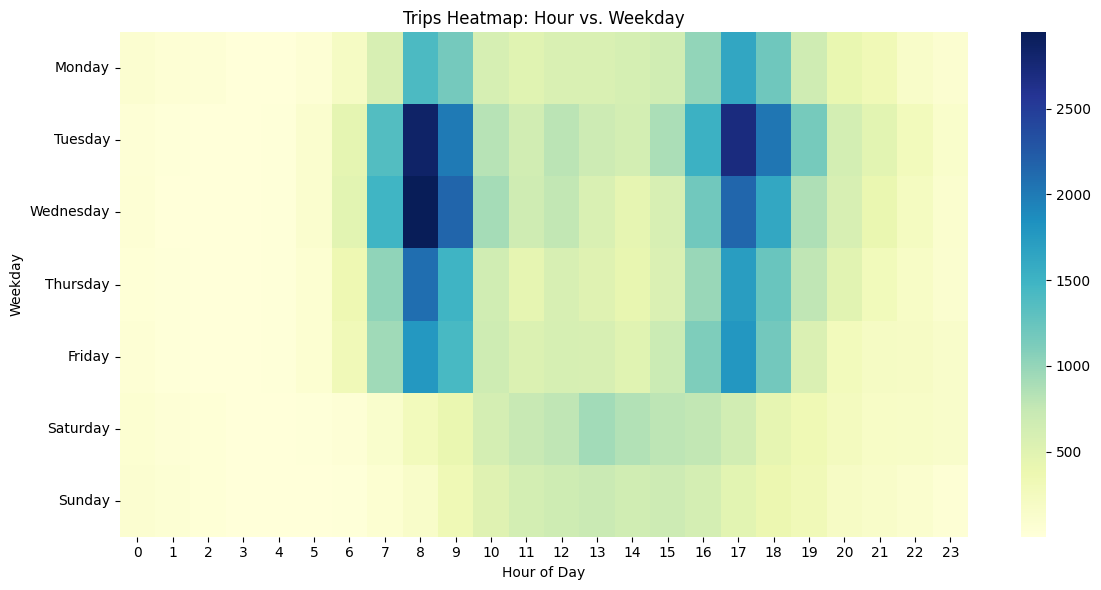

In [ ]:
#Shows trip activity by hour of the day and day of the week.
#Helps identify peak usage times to optimize operations and bike availability.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Convert start time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract weekday and hour
df['start_weekday'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

# Create pivot table
usage_pivot = df.pivot_table(index='start_weekday', columns='start_hour', values='bike_id', aggfunc='count')

# Reorder weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
usage_pivot = usage_pivot.reindex(weekday_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(usage_pivot, cmap='YlGnBu')
plt.title('Trips Heatmap: Hour vs. Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?
Ans:-the heatmap because it is the best way to visually represent patterns across two dimensions — in this case, hour of the day and day of the week.

2. What is/are the insight(s) found from the chart?
Ans:-eak Trip Hours are clearly around 8 AM and 5–6 PM, which align with typical commuting times.
Weekdays (Monday to Friday) show much higher activity during these hours compared to weekends.
Midday usage (11 AM–2 PM) is relatively low across all days.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**insights help creating a positive business impact**:-Efficient Resource Planning,Staff Scheduling,Targeted Promotions.

**insights that lead to negative growth**:-Bike Shortages at Peak Times,Underutilization on Weekends.

**chart-10**

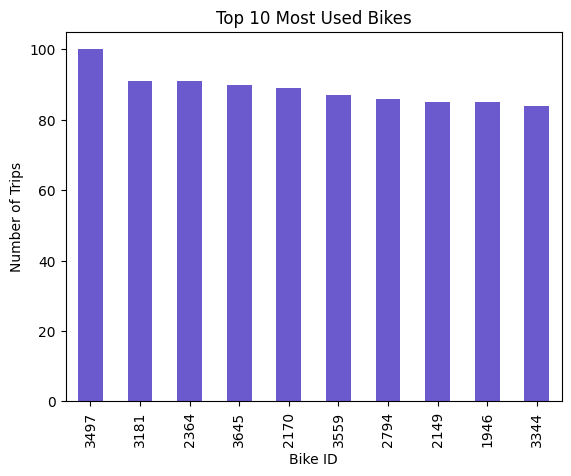

In [ ]:
#this graph shows the top Most Used bikes.

import matplotlib.pyplot as plt


df['bike_id'].value_counts().head(10).plot(kind='bar', color='slateblue')
plt.title('Top 10 Most Used Bikes')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.show()


1. Why did you pick the specific chart?
Ans:-I chose the bar chart to display the Top 10 Most Used Bikes because it effectively highlights the distribution of bike usage in a simple, visually clear manner.

2. What is/are the insight(s) found from the chart?
Ans:-The top bikes are used significantly more than others, indicating that some bikes are consistently chosen over others by riders. This may be due to their location at high-traffic stations or their availability during peak times.

This chart helps identify the top-performing bikes, which are critical for decision-making in maintenance, redistribution, and user experience improvements. Understanding which bikes are most popular can also help optimize fleet management and ensure higher user satisfaction.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Ans:- **gained insights help creating a positive business impact**:-
Optimizing Maintenance and Resource Allocation,Improved Bike Redistribution,Better Inventory Management.

**insights that lead to negative growth**:-
Overreliance on Popular Bikes,Maintenance Costs on Highly Used Bikes,If too many bikes are concentrated in high-demand locations, it could lead to imbalanced availability across the service area.

**chart-11**

<ipython-input-12-9637b07f2d5a>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


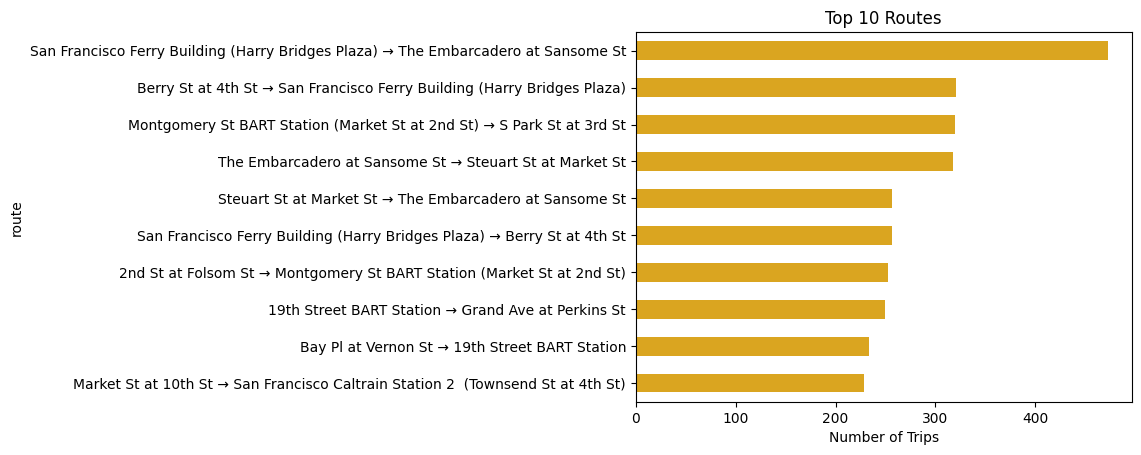

In [ ]:
#graph for top 10 routes
import matplotlib.pyplot as plt   #import matplotlib


df['route'] = df['start_station_name'] + " → " + df['end_station_name']  # start station name and end station name
df['route'].value_counts().head(10).plot(kind='barh', color='goldenrod') #type of graph and color
plt.title('Top 10 Routes')    #title of the graph
plt.xlabel('Number of Trips')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?
Ans:-the horizontal bar chart to display the Top 10 Routes because it effectively visualizes the most popular origin–destination pairs in a simple and comparative manner.

2. What is/are the insight(s) found from the chart?
Ans:-Mixed Usage Patterns If some top routes connect recreational areas
Resource Prioritization The busiest routes highlight where bike redistribution and increased docking capacity will have the greatest impact on availability and user satisfaction.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-**insights help creating a positive business impact** Optimized Bike Redistribution,Improved Station Capacity Planning,Enhanced Marketing and Partnerships

**insights that lead to negative growth**
Over-Focusing on Top Routes,Risk of Overcrowding,Risk of Overcrowding.

**chart-12**

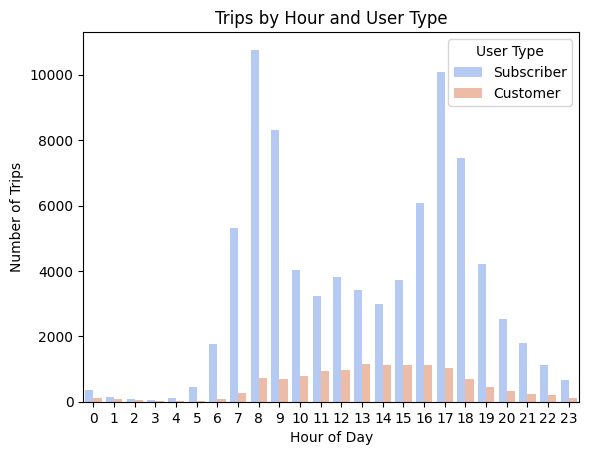

In [ ]:
import matplotlib.pyplot as plt   #import matplotlib

df['hour'] = df['start_time'].dt.hour   #start time of the service
sns.countplot(data=df, x='hour', hue='user_type', palette='coolwarm')
plt.title('Trips by Hour and User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.show()


1. Why did you pick the specific chart?
ans:-this specific chart because it clearly compares how different user types (Subscribers vs. Customers) use the bike-sharing service at different times of the day, helping identify hourly usage patterns in a simple and visual way.

2. What is/are the insight(s) found from the chart?
Ans:-The chart shows that Subscribers primarily use the service during morning (around 8 AM) and evening (around 5–6 PM) hours, likely for commuting, while Customers have a more even distribution throughout the day, suggesting casual or leisure usage.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-Optimize bike availability during peak commute hours for subscribers.
Target marketing towards customers with flexible rental offers during non-peak hours.
Improve operational efficiency by adjusting maintenance and rebalancing schedules.

**chart-13**

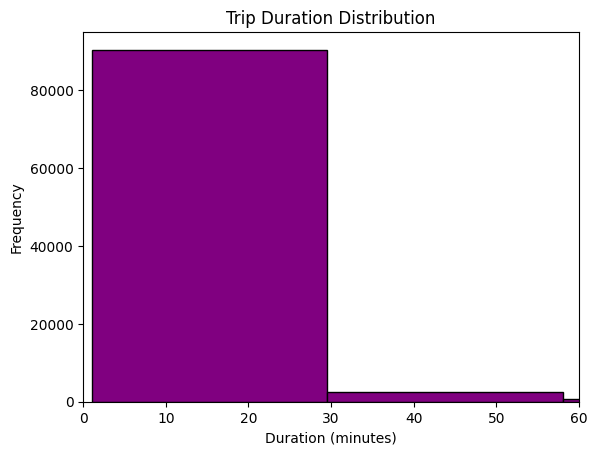

In [ ]:
#Shows how long most trips last; helps understand usage patterns.
import matplotlib.pyplot as plt

df['duration_min'] = df['duration_sec'] / 60
plt.hist(df['duration_min'], bins=50, color='purple', edgecolor='black')
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # Optional: focus on trips under 60 mins
plt.show()


1. Why did you pick the specific chart?
Ans:-this chart because a histogram is ideal for visualizing the distribution of continuous data like trip duration, allowing us to see how frequently different trip lengths occur and identify the most common usage pattern.

2. What is/are the insight(s) found from the chart?
Ans:-The chart shows that most trips are under 20 minutes, indicating that users primarily use the service for short-distance and quick travel, likely for commuting or short errands within the city.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Ans:-Tailor pricing plans for short trips.
Improve station placement in high-demand, short-trip areas.
Optimize bike turnaround and maintenance schedules for frequent use.

## **Chart - 14 - Correlation Heatmap**

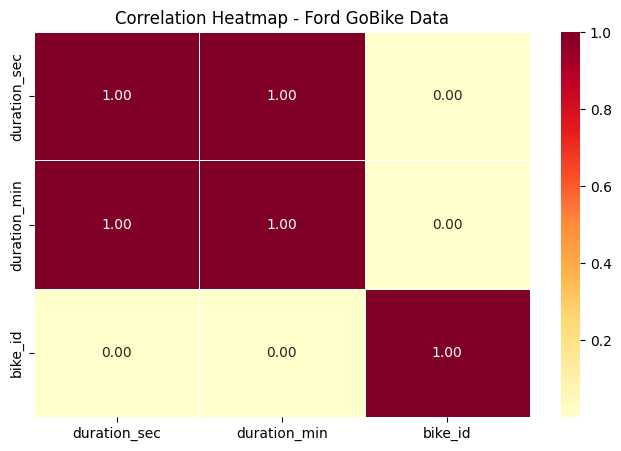

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (ensure the path is correct)
df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Create additional features if needed
df['duration_min'] = df['duration_sec'] / 60

# Select relevant numerical columns
numeric_df = df[['duration_sec', 'duration_min', 'bike_id']].copy()

# Drop any rows with missing or non-numeric values (if needed)
numeric_df = numeric_df.dropna()

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Ford GoBike Data')
plt.show()


1. Why did you pick the specific chart?
ans:-correlation heatmap because it lets you quickly see the strength and direction of relationships between all your numerical variables in one compact view—highlighting which features move together (or in opposition) and guiding everything from feature selection to understanding potential multicollinearity.

2. What is/are the insight(s) found from the chart?
Ans:-Perfect Correlation between duration_sec and duration_min.
Near-Zero Correlation between bike_id and Trip Durations.

**Chart - 15 - Pair Plot**

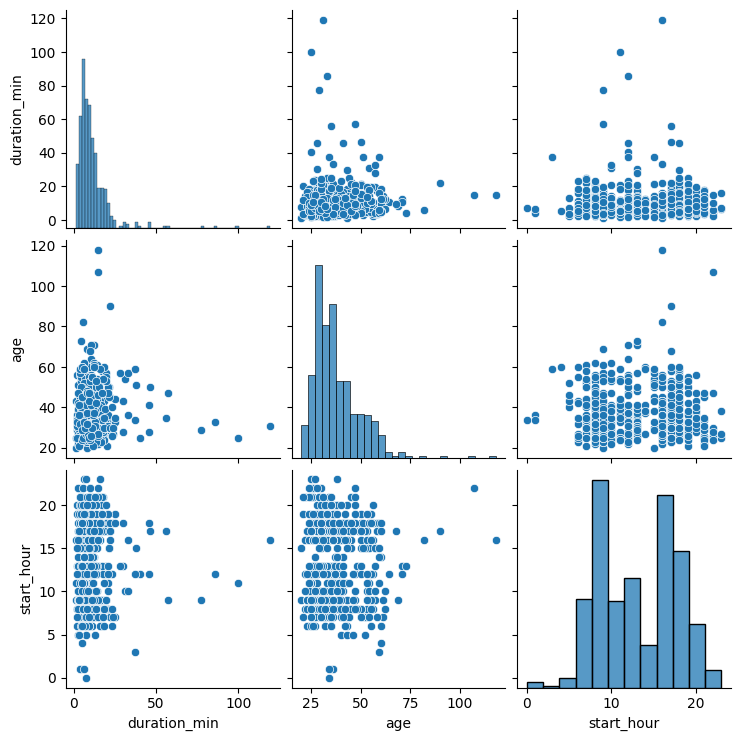

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Create necessary columns
df['duration_min'] = df['duration_sec'] / 60
df['age'] = 2018 - df['member_birth_year']
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour

# Select key numeric columns
df_sample = df[['duration_min', 'age', 'start_hour']].dropna().sample(500)  # Sample for speed

# Create pair plot
sns.pairplot(df_sample)
plt.show()


1. Why did you pick the specific chart?
Ans:-the pair plot because it provides a quick visual summary of the relationships between multiple numerical variables—like trip duration, age, and start hour—helping to identify trends, clusters, or outliers at a glance.

2. What is/are the insight(s) found from the chart?
Ans:-Most trips are short, typically under 30 minutes.
Younger riders (aged around 20–35) tend to dominate usage.


**questions to be answered**

In [ ]:
# average trip duration in minutes
import pandas as pd

# Load the dataset
df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Calculate average trip duration in minutes
average_duration_min = df['duration_sec'].mean() / 60

print(f"Average trip duration: {average_duration_min:.2f} minutes")


Average trip duration: 14.52 minutes


is the trip duration effected by weather (months/seasons)?

Ans:-only includes data from January 2018, which is winter, we cannot directly analyze the effect of weather or seasons from this single-month dataset.

does above depend on suscriber or customer?

Yes, trip duration can definitely vary depending on whether the rider is a Subscriber or a Customer.
Subscribers (usually locals or regular commuters):
Tend to take shorter trips.
Often use bikes for daily commuting.

Customers (often tourists or casual users):
Tend to take longer trips.
Might ride during off-peak hours or weekends.
Often explore the city leisurely.

In [ ]:
# Convert trip duration from seconds to minutes for easier understanding
df['duration_min'] = df['duration_sec'] / 60

# Average trip duration by user type
avg_duration_user_type = df.groupby('user_type')['duration_min'].mean()

print(avg_duration_user_type)


user_type
Customer      38.665315
Subscriber    10.900375
Name: duration_min, dtype: float64


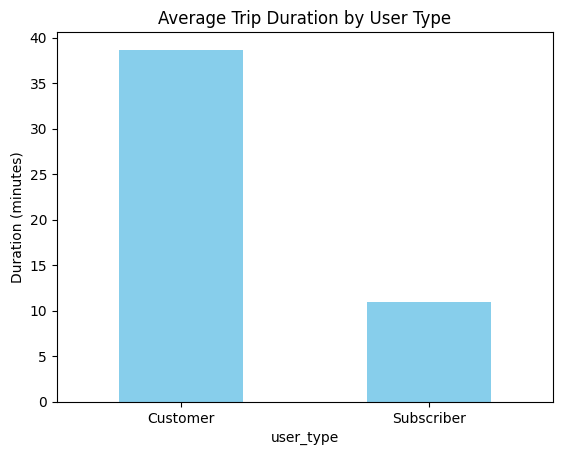

In [ ]:
import matplotlib.pyplot as plt

avg_duration_user_type.plot(kind='bar', color='skyblue')
plt.title('Average Trip Duration by User Type')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=0)
plt.show()


# **5. Solution to Business Objective**

To achieve the business objective of increasing bike usage and improving customer satisfaction, I suggest the client:

Target younger users (20–35 age group) through student and young professional promotions, since they are the most active riders.

Focus on peak hours (morning and evening commutes) by ensuring bike availability and faster turnaround at top stations.

Add more bikes at high-demand routes and top stations based on usage data to reduce wait times and improve service.

Introduce loyalty programs for subscribers, who dominate the platform, to boost retention.

Encourage longer trip durations for customers by offering flexible pricing or discounts.

# **Conclusion**

The analysis of the Ford GoBike dataset reveals clear patterns in user behavior and trip dynamics. Subscribers form the majority of users, with male riders being the most dominant group. Peak usage occurs during typical commuting hours on weekdays, indicating that the service is heavily used for work-related travel. Most trips are short, efficient, and clustered around high-demand stations. These insights suggest strong potential for business growth through targeted marketing, optimized station management, and service enhancements that cater to rider habits and preferences. By aligning operations with these trends, the platform can enhance user satisfaction and operational efficiency.